## **CNN with MNIST Data**

In [77]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [78]:
print(tf.__version__)

2.8.0


In [79]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [80]:
tf.config.list_physical_devices('GPU')

[]

In [81]:
# Release GPU memory to prevent memory-leaks.

#from numba import cuda
#device = cuda.get_current_device()
#device.reset()

In [82]:
#!nvidia-smi

In [83]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

In [84]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [85]:
# Checking the shape of one image
X_train[8].shape      #28 e 28 boyutta küçük küçük resimler rastgele bi resim seçtim
#gray scale 

(28, 28)

In [86]:
X_train[8] #0 lar siyah 255 e gittikçe beyazlaşıyor 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [87]:
X_train[8].shape

(28, 28)

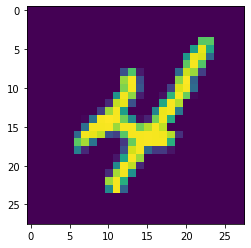

In [88]:
plt.imshow(X_train[9])
# plt.matshow(X_train[5])

In [89]:
y_train[9]

4

In [90]:
y_train  #bu şekilde modele verirsem model bunu regression modeli gibi düşünür 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

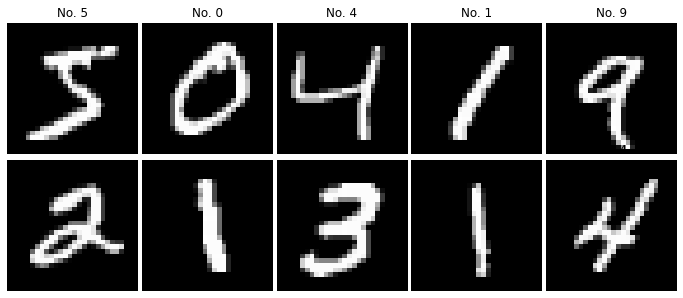

In [91]:
num_rows, num_cols = 2, 5                                                           #rastgele resimler seçtim yazdırdım
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [92]:
X_train[9].min()

0

In [93]:
X_train[9].max()

255

In [94]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255                               #255 e böldüğümüzde tüm pixeller 0 ile 1 arasında değer alıyor 
X_test /= 255

In [95]:
X_train[9].min()

0.0

In [96]:
X_train[9].max()

1.0

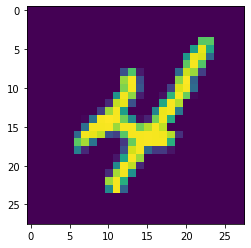

In [97]:
plt.imshow(X_train[9])

In [98]:
X_train.shape

(60000, 28, 28)

In [99]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) #aynı resmi 3 boyutlu olarak ifade ediyoruz shapeni değiştiriyoruz
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [100]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [102]:
#X_train[0]

In [103]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

(60000,)

In [104]:
from tensorflow.keras.utils import to_categorical  #to categorical 

In [105]:
Y_train = to_categorical(y_train, 10)  #10 category varmış desin
Y_test = to_categorical(y_test, 10)    #10 tane row oldu one hot encoding yaptık 
Y_test.shape

(10000, 10)

In [109]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [28]:
Y_train[0].reshape(-1,1)  #model classification yapmasını biliyor 

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [111]:
model = Sequential() #parametre olarak verebilirsin 

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
#32 filitre belirledik 32 neuron var her bir filitreinin boyutu 3x3 
model.add(MaxPool2D(pool_size=(2, 2))) #pool ekliyoruz 2 x2 en büyük değer

model.add(Flatten()) #pool layerdan aldığı değeri düzleştiriyor 

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [30]:
model.summary() # ilk katmanda 320 parametre var poolda bişi yok dense layerda 700000 outputta 1290

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=2) #kullancaksan epoch önemi yok eğer kullanmıcaksan çok iyi regülize 
#etmelisin yoksa ayvayı yersin 

In [33]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop]) #özellikle 0 ile64
#arasında tutuluyor yüksek vermek yoruyor 

Epoch 1/10
1875/1875 [==============================] - 49s 24ms/step - loss: 0.1558 - accuracy: 0.9542 - val_loss: 0.0639 - val_accuracy: 0.9789
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0526 - accuracy: 0.9836 - val_loss: 0.0610 - val_accuracy: 0.9814
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0506 - val_accuracy: 0.9835
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0388 - val_accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0441 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0498 - val_accuracy: 0.9846


In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
model.history.history

{'loss': [0.15584240853786469,
  0.05263744294643402,
  0.03408989682793617,
  0.024331558495759964,
  0.016466928645968437,
  0.011485295370221138],
 'accuracy': [0.954200029373169,
  0.9835833311080933,
  0.989549994468689,
  0.9923333525657654,
  0.9945999979972839,
  0.996150016784668],
 'val_loss': [0.0639258325099945,
  0.06099887192249298,
  0.05057958513498306,
  0.03875240683555603,
  0.04410839080810547,
  0.04984870180487633],
 'val_accuracy': [0.9789000153541565,
  0.9814000129699707,
  0.9835000038146973,
  0.9851999878883362,
  0.9858999848365784,
  0.9846000075340271]}

In [36]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.155842,0.954200,0.063926,0.9789
1,0.052637,0.983583,0.060999,0.9814
2,0.034090,0.989550,0.050580,0.9835
3,0.024332,0.992333,0.038752,0.9852
4,0.016467,0.994600,0.044108,0.9859


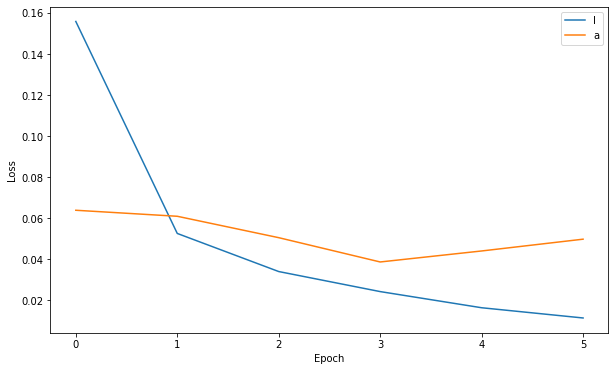

In [37]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

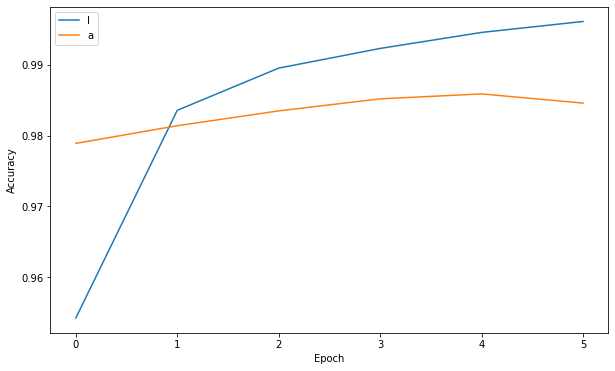

In [38]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [39]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 3s 8ms/step - loss: 0.0498 - accuracy: 0.9846
[0.04984870180487633, 0.9846000075340271]


In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
preds = model.predict(X_test)
preds

array([[2.69415240e-10, 1.93148466e-07, 3.55901730e-09, ...,
        9.99999762e-01, 1.22378574e-09, 2.26439578e-08],
       [2.12386997e-09, 3.11183057e-09, 1.00000000e+00, ...,
        1.23491644e-13, 3.24536453e-10, 6.78861264e-12],
       [1.54291122e-08, 9.99997377e-01, 2.50495091e-08, ...,
        5.74606702e-07, 1.35964015e-07, 1.32900180e-09],
       ...,
       [7.69072935e-16, 1.66682657e-11, 7.79752009e-16, ...,
        3.50821899e-10, 6.57281951e-10, 1.40862810e-09],
       [3.90936762e-12, 4.42558215e-14, 3.56611925e-15, ...,
        1.31558072e-11, 5.59266155e-05, 9.15401713e-11],
       [2.09122979e-11, 4.71865995e-14, 1.11521076e-13, ...,
        8.74486542e-17, 1.96837033e-10, 3.57109850e-13]], dtype=float32)

In [48]:
preds[0] #0 resim için 0. classa ait olma olasılığı 1 e ait olma olasılığı 

array([2.6941524e-10, 1.9314847e-07, 3.5590173e-09, 3.1240766e-08,
       2.2946584e-10, 4.2957643e-12, 1.1707516e-15, 9.9999976e-01,
       1.2237857e-09, 2.2643958e-08], dtype=float32)

In [51]:
predictions= np.argmax(preds, axis=1) #argmax ile dönüştürdük 

In [52]:
len(predictions)

10000

In [53]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.97      0.98      1010
           4       0.97      1.00      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [55]:
print(confusion_matrix(y_test, predictions))

[[ 972    1    2    0    0    0    4    1    0    0]
 [   0 1126    0    0    1    1    5    0    1    1]
 [   1    0 1019    0    1    0    2    6    3    0]
 [   0    0    3  981    0   22    0    3    1    0]
 [   0    0    0    0  981    0    1    0    0    0]
 [   2    0    0    3    0  882    4    0    1    0]
 [   2    2    0    0    5    2  945    0    2    0]
 [   1    5    6    0    1    0    0 1009    2    4]
 [   2    0    2    0    4    1    4    4  954    3]
 [   1    3    1    0   18    4    0    4    1  977]]


In [56]:
score = model.evaluate(X_test, Y_test, verbose=0) #2 değer döndürür
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04984870180487633
Test accuracy: 0.9846000075340271


In [57]:
my_number = X_test[5]

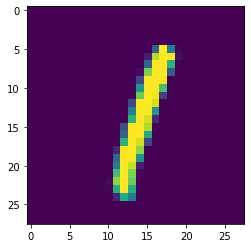

In [58]:
plt.imshow(my_number.reshape(28,28));

In [59]:
model.predict(my_number.reshape(1,28,28,1))

array([[6.71913636e-09, 9.99990225e-01, 6.21465945e-09, 2.45404894e-11,
        8.57495479e-07, 1.04377385e-07, 5.11405807e-09, 8.56481620e-06,
        2.06626254e-07, 3.01263512e-08]], dtype=float32)

In [60]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1) #bir data frame çevirdik burada 

array([1], dtype=int64)

In [61]:
model.save("cnn-1.h5")